In [9]:
cd /content/drive/MyDrive/Machine-Learning-fetch

/content/drive/MyDrive/Machine-Learning-fetch


Set the working directory and import all the libraries needed to run the code

In [5]:
ls

drive/  sample_data/


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('data_daily.csv')

In [22]:
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [23]:
df.columns

Index(['# Date', 'Receipt_Count'], dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   # Date         365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


No null values in the dataset . Input predictor is Date and output target variable is Receipt_count

In [26]:
df.columns=['Date','Receipt_count']

In [27]:
# Change Date into datetime format
df['Date']=pd.to_datetime(df['Date'])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Receipt_count  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [29]:
df.head()

,Date,Receipt_count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [30]:
df = df.set_index('Date')

In [32]:
df.head()

,Receipt_count
Date,
2021-01-01,7564766
2021-01-02,7455524
2021-01-03,7095414
2021-01-04,7666163
2021-01-05,7771289


In [33]:
df.index = pd.to_datetime(df.index)

Plot the Graph for Receipt count . The graph is linear and it trends upwards

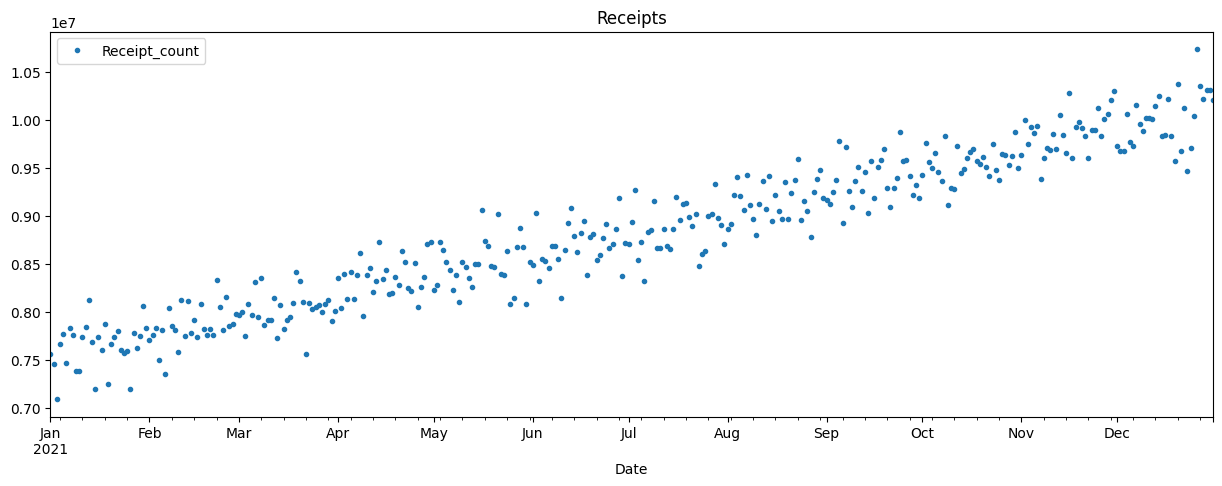

In [34]:
import matplotlib.pyplot as plt
df.plot(style='.',
        figsize=(15, 5),
        title='Receipts')
plt.show()

Days before October is considered as training and days after it is for testing

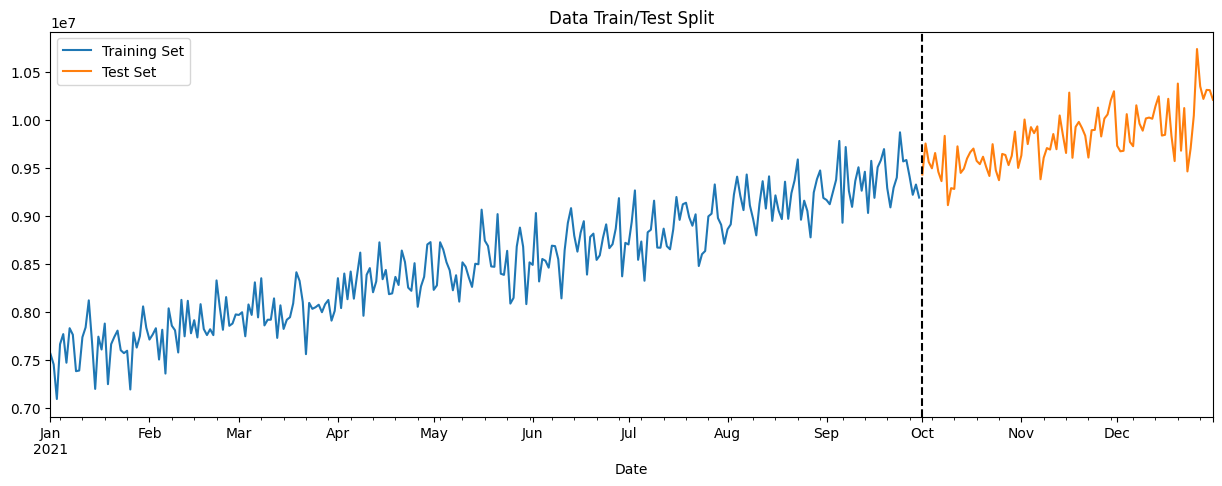

In [35]:
train = df.loc[df.index < '2021-10-01']
test = df.loc[df.index >= '2021-10-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2021-10-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

We just have one single column/predictor to predict the target variable receipt count . We increase the strength of the data my adding additional predcitors like 'dayofweek','quarter','month','dayofyear','dayofmonth' and 'weekofyear'

In [36]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [37]:
df.head()

,Receipt_count,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear
Date,,,,,,,
2021-01-01,7564766,4,1,1,1,1,53
2021-01-02,7455524,5,1,1,2,2,53
2021-01-03,7095414,6,1,1,3,3,53
2021-01-04,7666163,0,1,1,4,4,1
2021-01-05,7771289,1,1,1,5,5,1


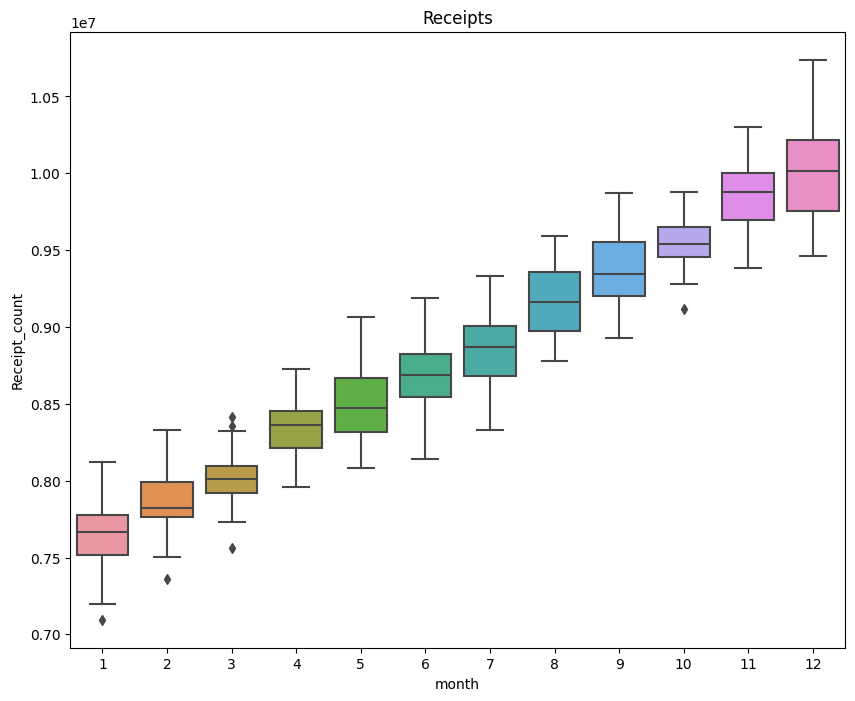

In [38]:
# Exploratory Data Analysis . Checking the trend of the data through month
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Receipt_count')
ax.set_title('Receipts')
plt.show()

In [39]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofweek', 'quarter', 'month','dayofyear','dayofmonth','weekofyear']
TARGET = 'Receipt_count'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

A **simple linear regression** model could be fitted . But I choose to use **eXtreme Gradient Boosting(XGBoost) ** technique . The main reason for using XGBoost technique is that it includes **L1 and L2 regularization** terms in its objective function. These regularization terms penalize overly complex models, preventing overfitting and improving the model's ability to generalize to new data.They also provide a mechanism for assessing feature importance.

In [52]:
import xgboost as xgb
reg = xgb.XGBRegressor(base_score=0.5, booster='gblinear',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:8036728.68291	validation_1-rmse:9014332.64252
[71]	validation_0-rmse:1856084.98688	validation_1-rmse:2996289.98043


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:04:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

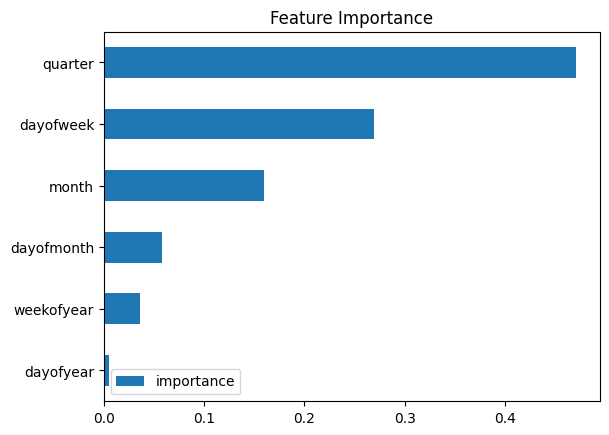

In [53]:
# Feature importance plot
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

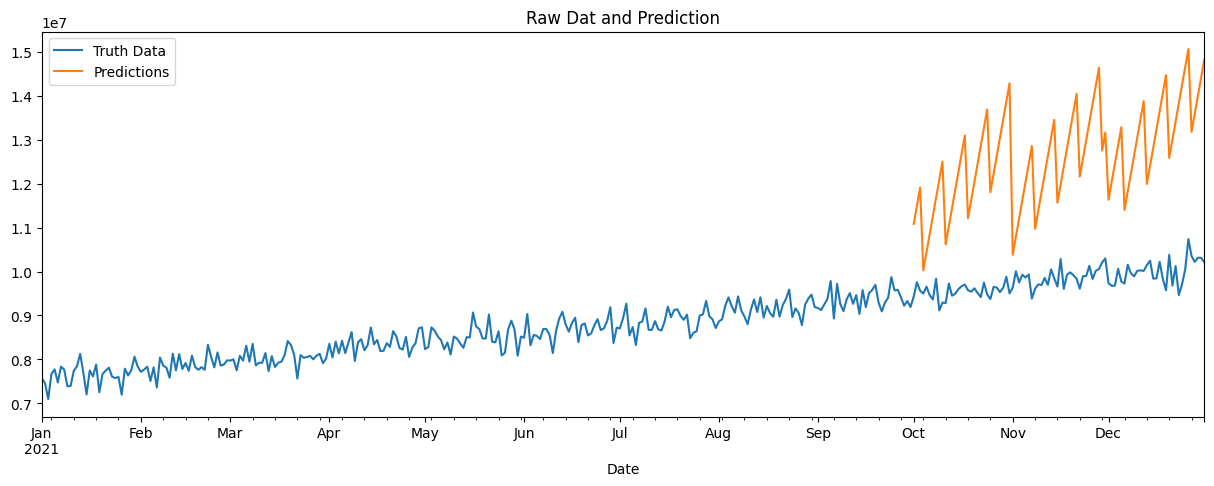

In [56]:
# Prediction for testing data
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Receipt_count']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [55]:
# RMSE Score on testing data
import numpy as np

actual = test['Receipt_count'].values
predicted = test['prediction'].values

# Calculate the mean squared error
mse = np.mean((actual - predicted) ** 2)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'RMSE Score for model1 on Test set: {rmse:0.2f}')


RMSE Score for model1 on Test set: 2996289.97


The RMSE value is too high and the predictions from the plot are off indicating we need to change the parameters of the model

In [ ]:
np.mean(df['Receipt_count'])

8826566.052054795

After a series of trials and using hyper parameter tuning techniques we get the below parameters as the best learning parameters among all

In [57]:
reg = xgb.XGBRegressor(booster='gblinear',
                       n_estimators=300,
                       objective='reg:squarederror',
                       max_depth=4,
                       gamma=0.4,
                       min_child_weight=7,
                       colsample_bytree=0.7,
                       learning_rate=0.15)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:556840.87318	validation_1-rmse:1109809.18064
[1]	validation_0-rmse:534783.00617	validation_1-rmse:1000629.72636
[2]	validation_0-rmse:515322.66021	validation_1-rmse:934860.28463
[3]	validation_0-rmse:497264.77270	validation_1-rmse:885943.26641
[4]	validation_0-rmse:480604.59133	validation_1-rmse:844657.37815
[5]	validation_0-rmse:465316.54748	validation_1-rmse:807710.65591
[6]	validation_0-rmse:451319.64686	validation_1-rmse:773852.43143
[7]	validation_0-rmse:438514.46448	validation_1-rmse:742540.21744
[8]	validation_0-rmse:426798.30067	validation_1-rmse:713482.90027
[9]	validation_0-rmse:416073.92114	validation_1-rmse:686479.31140
[10]	validation_0-rmse:406250.14046	validation_1-rmse:661368.25035
[11]	validation_0-rmse:397242.56783	validation_1-rmse:638007.88056
[12]	validation_0-rmse:388973.01719	validation_1-rmse:616273.04898
[13]	validation_0-rmse:381370.50007	validation_1-rmse:596035.06631
[14]	validation_0-rmse:374370.35314	validation_1-rmse:577189.75270
[15

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:05:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[34]	validation_0-rmse:300616.36468	validation_1-rmse:376046.55692
[35]	validation_0-rmse:298562.60276	validation_1-rmse:370982.32478
[36]	validation_0-rmse:296582.63880	validation_1-rmse:366170.77661
[37]	validation_0-rmse:294671.61943	validation_1-rmse:361591.60623
[38]	validation_0-rmse:292824.82947	validation_1-rmse:357231.13937
[39]	validation_0-rmse:291037.93593	validation_1-rmse:353073.29780
[40]	validation_0-rmse:289307.45299	validation_1-rmse:349104.42508
[41]	validation_0-rmse:287630.18851	validation_1-rmse:345311.80538
[42]	validation_0-rmse:286002.81670	validation_1-rmse:341684.89570
[43]	validation_0-rmse:284423.07248	validation_1-rmse:338211.37721
[44]	validation_0-rmse:282887.86962	validation_1-rmse:334882.82844
[45]	validation_0-rmse:281395.61609	validation_1-rmse:331689.33308
[46]	validation_0-rmse:279943.92406	validation_1-rmse:328622.43448
[47]	validation_0-rmse:278531.05732	validation_1-rmse:325675.26910
[48]	validation_0-rmse:277155.41231	validation_1-rmse:322840.4

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
linear_coefs = reg.coef_
print("Linear Regression Coefficients:")
print(linear_coefs)

feature_importances = reg.feature_importances_
print("Feature Importances:")
print(feature_importances)




Linear Regression Coefficients:
[  785.642 35915.8   66847.8    4547.37    436.167  -880.994]
Feature Importances:
[ 0.007298    0.33362916  0.6209635   0.04224148  0.00405165 -0.00818374]


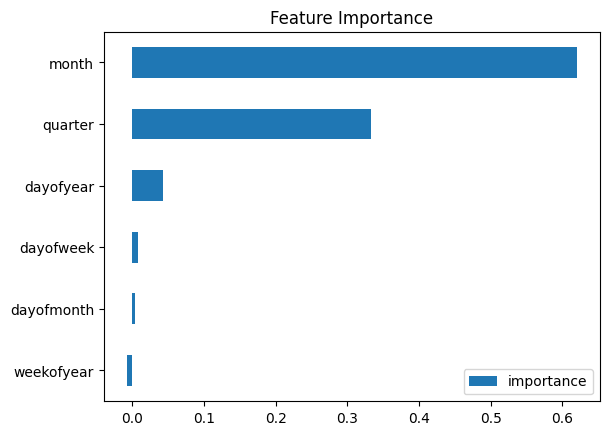

In [59]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

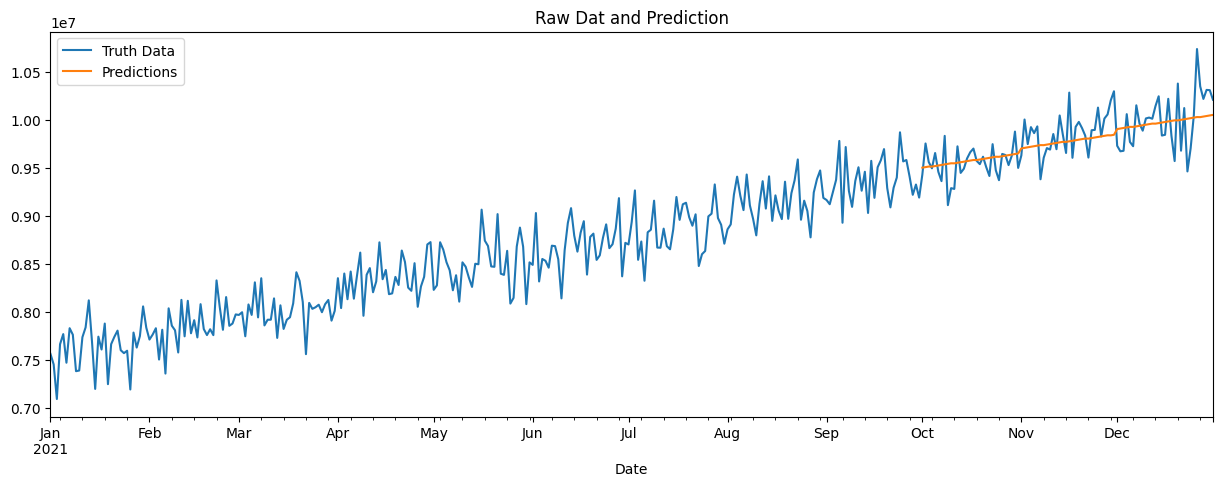

In [68]:
# Prediction on testing data
# Run this cell twice if errors
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Receipt_count']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [69]:
# RMSE Score on testing data
import numpy as np

actual = test['Receipt_count'].values
predicted = test['prediction'].values

# Calculate the mean squared error
mse = np.mean((actual - predicted) ** 2)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'RMSE Score for model on Test set: {rmse:0.2f}')

RMSE Score for model on Test set: 218030.78


Model prediction for year 2022

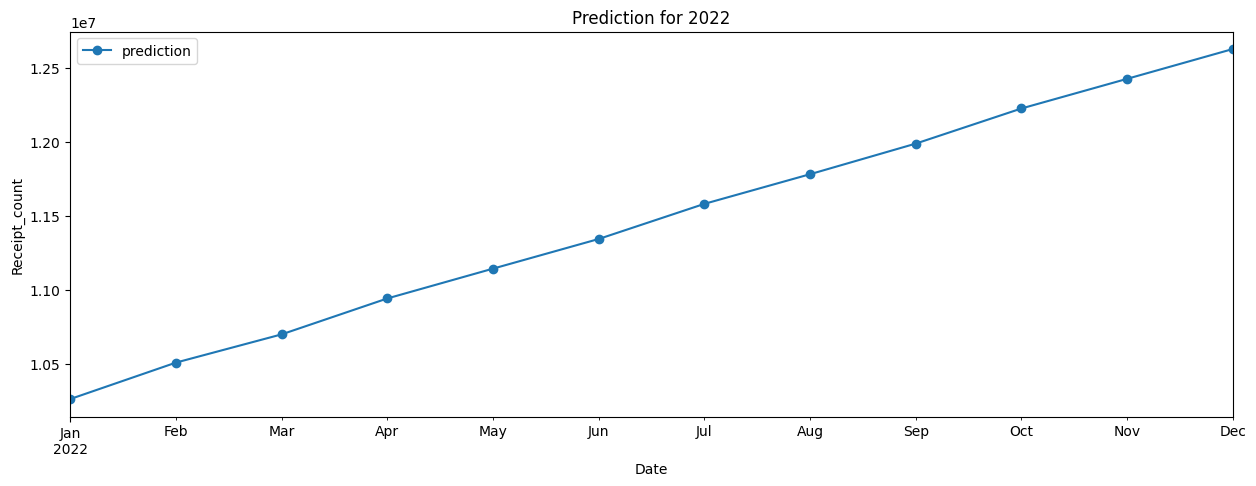

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

df = create_features(df)

# Create features for each month in 2022
months_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')
df_2022 = pd.DataFrame(months_2022, columns=['Date'])
df_2022 = create_features(df_2022.set_index('Date'))
df_2022['quarter']=df_2022['quarter']+4
df_2022['month']=df_2022['month']+12
df_2022['dayofyear']=df_2022['dayofyear']+365
df_2022['dayofmonth']=df_2022['dayofmonth']+365
df_2022['weekofyear']=df_2022['weekofyear']+52
df_2022['dayofweek']=df_2022['dayofweek']


# Use the trained model to predict Receipt_count for each month in 2022
X_2022 = df_2022[FEATURES]
df_2022['prediction'] = reg.predict(X_2022)

# Plot the predictions for 2022
ax = df_2022[['prediction']].plot(figsize=(15, 5), marker='o')
ax.set_title('Prediction for 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Receipt_count')
plt.show()


In [71]:
months_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
df_2022 = pd.DataFrame(months_2022, columns=['Date'])
df_2022 = create_features(df_2022.set_index('Date'))
df_2022['quarter']=df_2022['quarter']+4
df_2022['month']=df_2022['month']+12
df_2022['dayofyear']=df_2022['dayofyear']+365
df_2022['dayofmonth']=df_2022['dayofmonth']+365
df_2022['weekofyear']=df_2022['weekofyear']+52
df_2022['dayofweek']=df_2022['dayofweek']

In [72]:
# Convert the input month string to its numeric representation
import calendar
# Input the month here
selected_month="February"
month_number = list(calendar.month_name).index(selected_month)

# Filter data for the selected month
selected_month_data = df[df.index.month == month_number]
selected_month_data = df_2022[df_2022.index.month == 6]

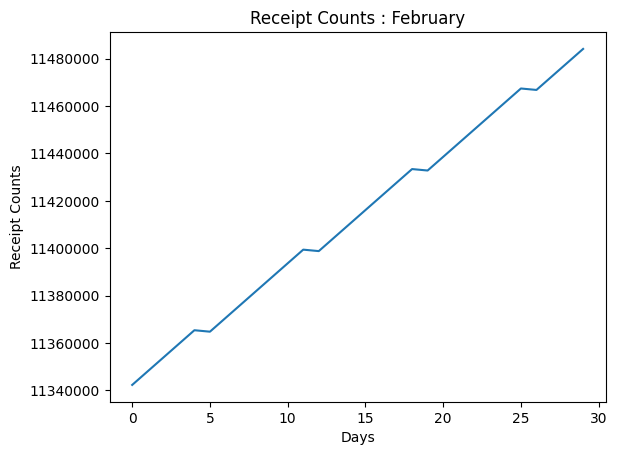

In [73]:
X_2022 =selected_month_data[FEATURES]
test= reg.predict(X_2022)

plt.plot(test)
plt.title('Receipt Counts : {}'.format(selected_month))
plt.ylabel('Receipt Counts')
plt.xlabel('Days')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [ ]:
# Save the model
import joblib
joblib.dump(reg, 'xgb_model.pkl')

['xgb_model.pkl']